# 3. Khám phá dữ liệu trong từng cột

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [115]:
df = pd.read_csv('../data/imdb_clean.csv')


## 3.1. Cột `"Date"`

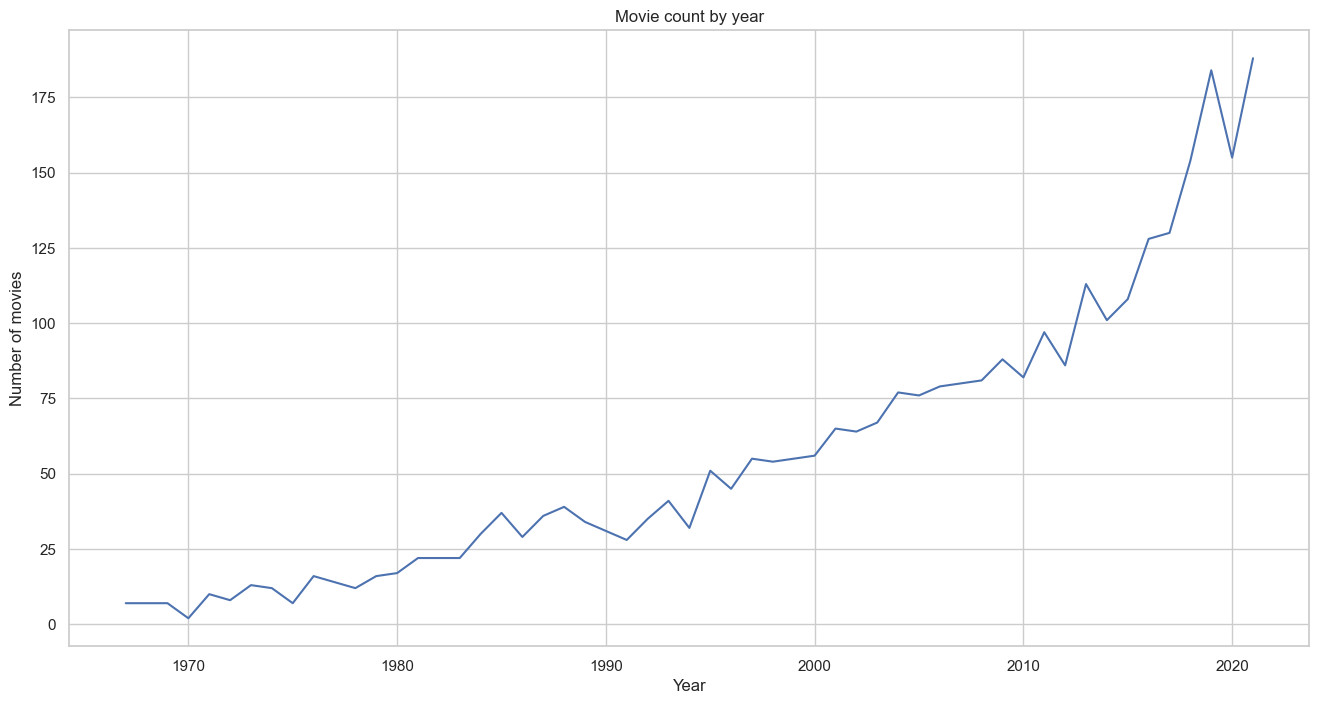

In [116]:
df_date = df.groupby('Date').size().reset_index(name='Count')
plt.figure(figsize=(16,8))
plt.plot(df_date['Date'], df_date['Count'])
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Movie count by year')
plt.show()

Dựa trên biểu đồ phân bố số lượng phim sản xuất theo năm, chúng ta có thể thấy rằng số lượng phim sản xuất trong các năm gần đây tăng lên đáng kể, đặc biệt là trong khoảng thời gian từ năm 2000 trở đi. Trong khi đó, số lượng phim sản xuất trong các năm trước đó tương đối thấp.

Ngoài ra, chúng ta cũng có thể nhận thấy một sự tăng trưởng nhanh chóng của ngành công nghiệp điện ảnh trong thế kỷ 21, có thể là do sự phát triển của công nghệ và việc phổ biến của các phương tiện truyền thông, giúp các bộ phim được tiếp cận và quảng bá tốt hơn.

## 3.2. Cột `"Duaration"`

<Axes: xlabel='Duration', ylabel='Count'>

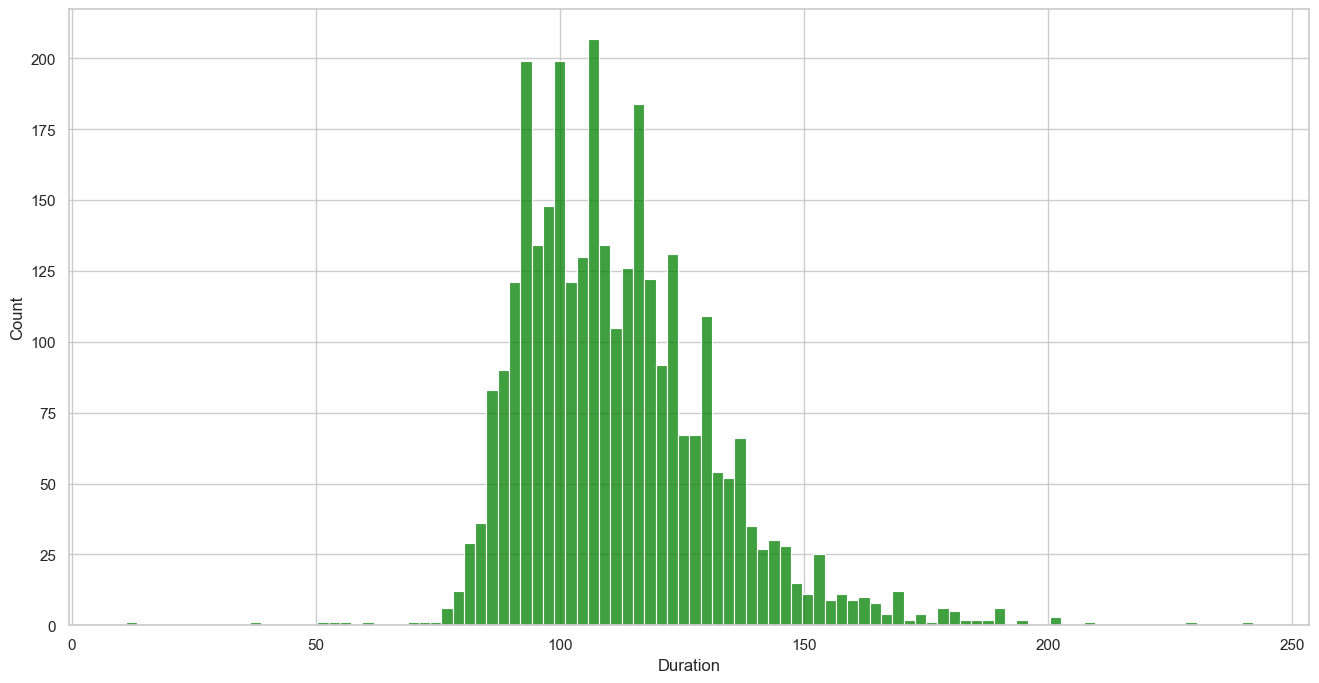

In [117]:
# Code here (hisplot)
fig = plt.figure(figsize=(16, 8))
sns.histplot(df['Duration'], bins = 100, color="green")

Dựa trên biểu đồ phân bố thời lượng phim sản xuất, chúng ta có thể thấy rằng phần lớn các bộ phim có thời lượng trong khoảng từ 80 đến 140 phút. Có một số bộ phim rất dài (từ 180 đến 400 phút) nhưng chúng khá hiếm trong số các bộ phim được sản xuất. Điều này cho thấy rằng, trong ngành công nghiệp điện ảnh, thời lượng phim không thể quá ngắn hoặc quá dài để có thể thu hút được sự chú ý của khán giả.

## 3.3. Cột `"Votes"`

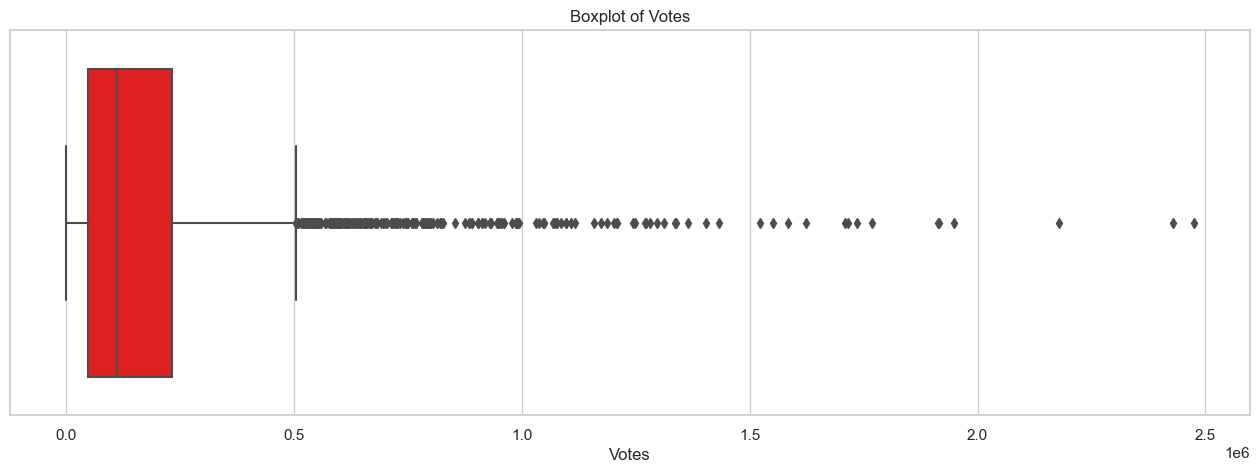

In [118]:
# Code here (hisplot) Ở trên xài hist rồi thì có thể xài boxplot ở đây
import seaborn as sns

plt.figure(figsize=(16,5))
sns.boxplot(x=df["Votes"], color="red")
plt.title("Boxplot of Votes")
plt.xlabel("Votes")
plt.show()


Dựa trên biểu đồ, ta có thể thấy rằng:

* Số phiếu bầu của các bộ phim phân bố rộng, từ khoảng 50 đến hơn 2 triệu phiếu bầu.
* Có rất nhiều outlier (những điểm dữ liệu nằm ngoài whiskers) trên đồ thị, cho thấy rằng có rất nhiều bộ phim đã thu hút được sự chú ý của một lượng lớn khán giả.
* Boxplot cũng cho thấy rằng trung vị (median) của số phiếu bầu cho các bộ phim rơi vào khoảng từ 5.000 đến 50.000 phiếu bầu.
* Sự phân bố của số phiếu bầu có xu hướng bị lệch phải, có nghĩa là có nhiều bộ phim đã nhận được số phiếu bầu cao hơn so với trung bình.

## 3.4. Cột `"Rate"`

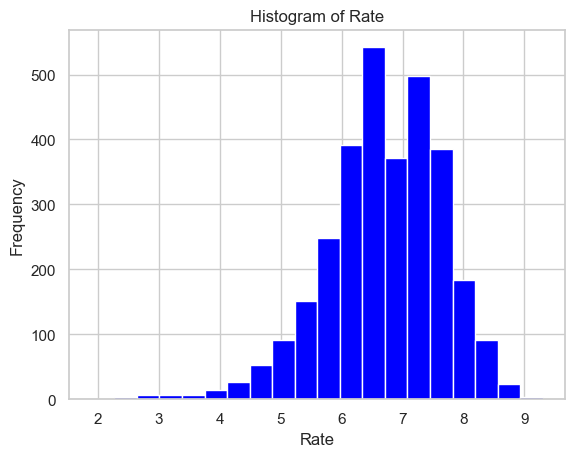

In [119]:
# Code here (chưa biết dùng gì nên dùng 2 cách)
plt.hist(df["Rate"], bins=20, color="blue")
plt.title("Histogram of Rate")
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.show()

Theo biểu đồ histogram, ta thấy phân bố đánh giá phim trên IMDb khá lệch về phía trung bình trên thang điểm 0-10, với đa số phim đạt điểm đánh giá từ 6 đến 8.

In [120]:
print(df['Rate'].describe())

count    3105.000000
mean        6.693655
std         0.961984
min         1.900000
25%         6.100000
50%         6.800000
75%         7.400000
max         9.300000
Name: Rate, dtype: float64


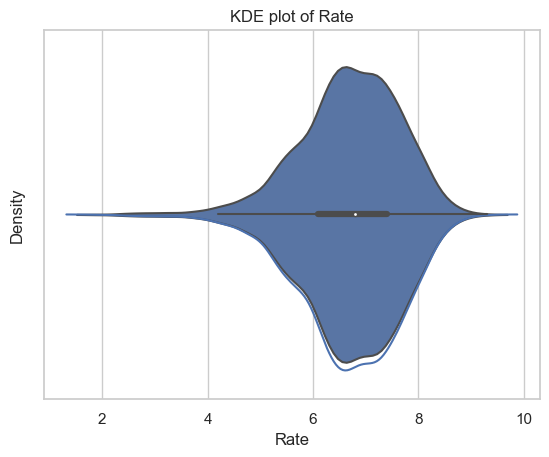

In [121]:
sns.kdeplot(data=df, x="Rate")
sns.violinplot(x=df["Rate"], inner="box")
plt.title("KDE plot of Rate")
plt.xlabel("Rate")
plt.show()

Biểu đồ KDE (Kernel Density Estimate) cũng cho thấy phân bố tương tự, với đỉnh đạt tại khoảng 7.0. Kết hợp với boxplot, ta thấy trung vị (median) của cột "Rate" là khoảng 6.8. Ta có thể thấy rằng phần lớn các phim trong bộ dữ liệu này được đánh giá từ trung bình đến cao trên IMDb.

## 3.5. Cột `"Certificate"`

<Axes: xlabel='Certificate', ylabel='count'>

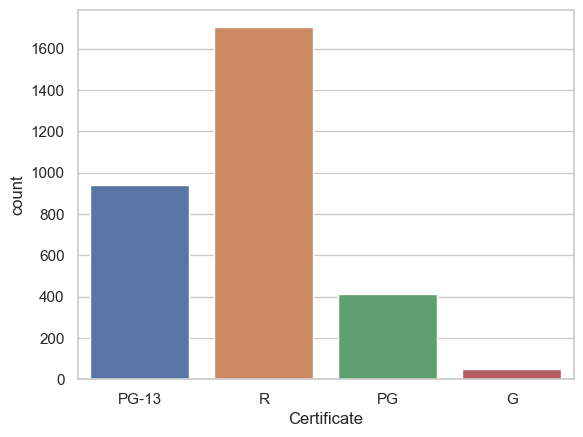

In [122]:
# Code here (countplot)
sns.countplot(x = df["Certificate"])

## 3.6. Cột `"Nudity"`

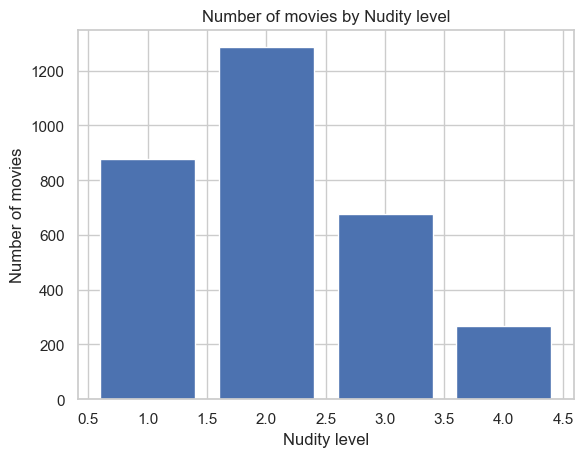

In [123]:
nudity_counts = df["Nudity"].value_counts()
plt.bar(nudity_counts.index, nudity_counts.values)
plt.title("Number of movies by Nudity level")
plt.xlabel("Nudity level")
plt.ylabel("Number of movies")
plt.show()

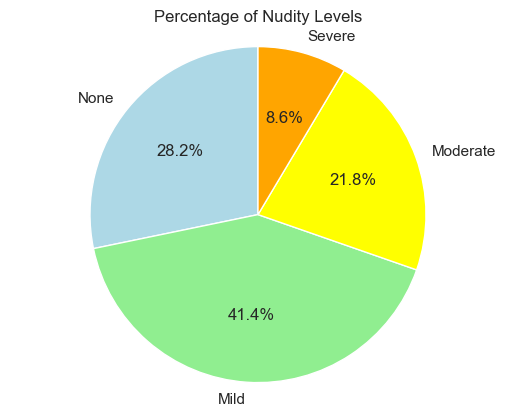

In [124]:
# Tính phần trăm các mức độ Nudity
none_percent = df[df["Nudity"] == 1].shape[0] / df.shape[0] * 100
mild_percent = df[df["Nudity"] == 2].shape[0] / df.shape[0] * 100
moderate_percent = df[df["Nudity"] == 3].shape[0] / df.shape[0] * 100
severe_percent = df[df["Nudity"] == 4].shape[0] / df.shape[0] * 100

# Vẽ biểu đồ tròn
labels = ["None", "Mild", "Moderate", "Severe"]
sizes = [none_percent, mild_percent, moderate_percent, severe_percent]
colors = ["lightblue", "lightgreen", "yellow", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage of Nudity Levels")
plt.show()

Dựa vào biểu đồ tròn, ta có thể rút ra các kết luận sau về cột Nudity:

* Số lượng phim có cảnh nudity nhẹ (mức độ Mild) chiếm đa số, với khoảng 41.4% các phim trong dữ liệu có mức độ này.
* Số lượng phim không có cảnh nudity (mức độ None) chiếm khoảng 28% các phim và cảnh nudity vừa phải (mức độ Moderate) chiếm khoảng 22%
* Còn lại là có cảnh nudity nặng (mức độ Severe)

Như vậy trên trang web IMDb chứa các phim có cảnh nudity nhẹ hoặc không có nudity, nếu có thì đa số ở mức độ vừa phải

## 3.7. Cột `"Violence"`

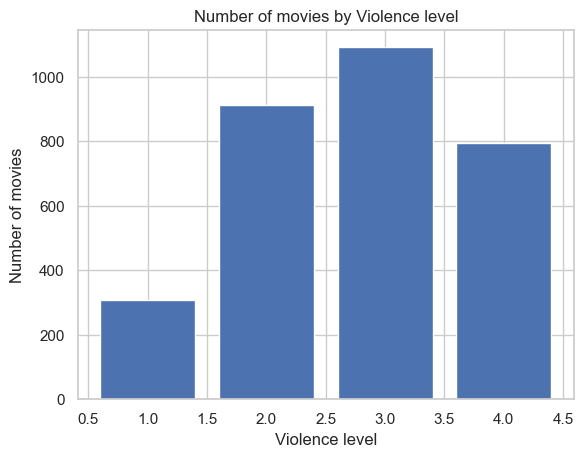

In [125]:
violence_counts = df["Violence"].value_counts()
plt.bar(violence_counts.index, violence_counts.values)
plt.title("Number of movies by Violence level")
plt.xlabel("Violence level")
plt.ylabel("Number of movies")
plt.show()

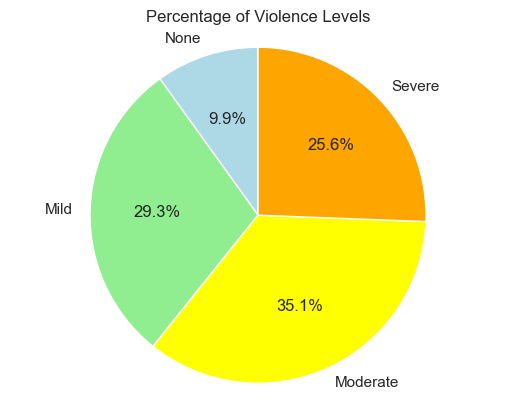

In [129]:
# Tính phần trăm các mức độ Violence
none_percent = df[df["Violence"] == 1].shape[0] / df.shape[0] * 100
mild_percent = df[df["Violence"] == 2].shape[0] / df.shape[0] * 100
moderate_percent = df[df["Violence"] == 3].shape[0] / df.shape[0] * 100
severe_percent = df[df["Violence"] == 4].shape[0] / df.shape[0] * 100

# Vẽ biểu đồ tròn
labels = ["None", "Mild", "Moderate", "Severe"]
sizes = [none_percent, mild_percent, moderate_percent, severe_percent]
colors = ["lightblue", "lightgreen", "yellow", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage of Violence Levels")
plt.show()

Dựa vào biểu đồ tròn, ta có thể rút ra các kết luận sau về cột Violence:

* Số lượng phim có cảnh violence vừa phải (mức độ Moderate) chiếm đa số, với khoảng 35% các phim trong dữ liệu có mức độ này.
* Số lượng phim không có cảnh violence (mức độ None) chiếm khoảng 10%.

Như vậy trên trang web IMDb chứa các phim đa số có cảnh violence.

## 3.8. Cột `"Profanity"`

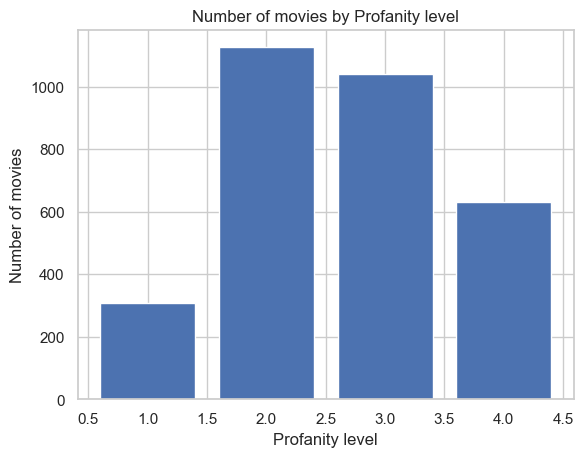

In [126]:
profanity_counts = df["Profanity"].value_counts()
plt.bar(profanity_counts.index, profanity_counts.values)
plt.title("Number of movies by Profanity level")
plt.xlabel("Profanity level")
plt.ylabel("Number of movies")
plt.show()

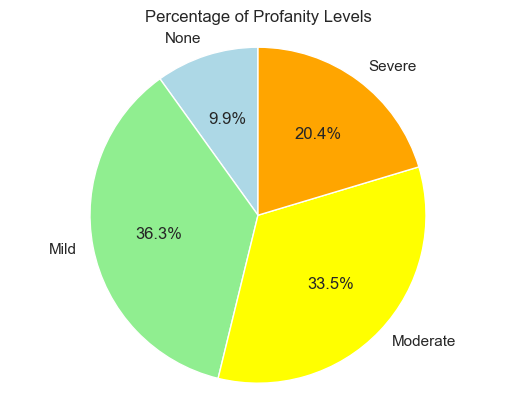

In [130]:
# Tính phần trăm các mức độ Violence
none_percent = df[df["Profanity"] == 1].shape[0] / df.shape[0] * 100
mild_percent = df[df["Profanity"] == 2].shape[0] / df.shape[0] * 100
moderate_percent = df[df["Profanity"] == 3].shape[0] / df.shape[0] * 100
severe_percent = df[df["Profanity"] == 4].shape[0] / df.shape[0] * 100

# Vẽ biểu đồ tròn
labels = ["None", "Mild", "Moderate", "Severe"]
sizes = [none_percent, mild_percent, moderate_percent, severe_percent]
colors = ["lightblue", "lightgreen", "yellow", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage of Profanity Levels")
plt.show()

Dựa vào biểu đồ tròn, ta có thể rút ra các kết luận sau về cột Profanity:

* Số lượng phim có cảnh profanity vừa phải (mức độ Moderate) và có cảnh profanity nhẹ (mức độ Mild) chiếm đa số, với khoảng 33%-36% các phim trong dữ liệu có mức độ này.
* Số lượng phim không có cảnh profanity (mức độ None) chiếm khoảng 10%. Còn lại là mức độ Severe.

Như vậy trên trang web IMDb chứa các phim đa số có cảnh profanity.

## 3.9. Cột `"Alcohol"`

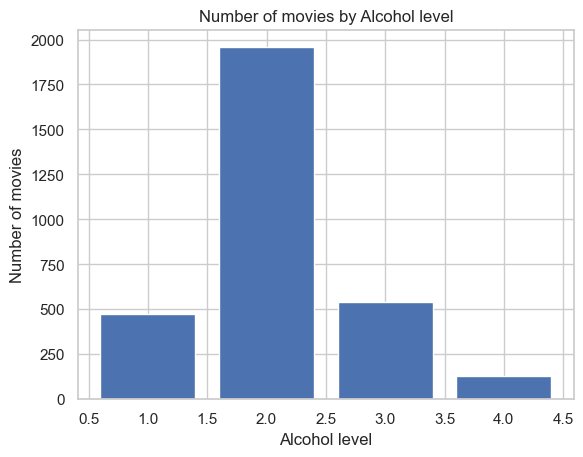

In [127]:
alcohol_counts = df["Alcohol"].value_counts()
plt.bar(alcohol_counts.index, alcohol_counts.values)
plt.title("Number of movies by Alcohol level")
plt.xlabel("Alcohol level")
plt.ylabel("Number of movies")
plt.show()

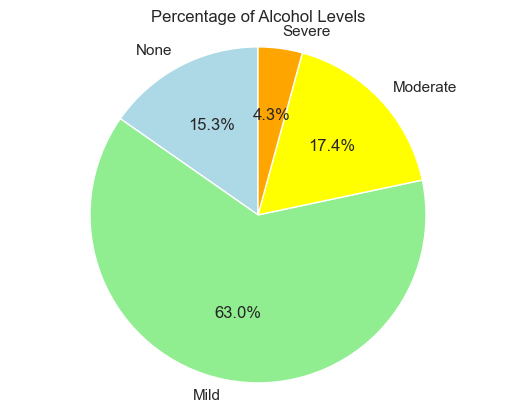

In [131]:
# Tính phần trăm các mức độ Alcohol
none_percent = df[df["Alcohol"] == 1].shape[0] / df.shape[0] * 100
mild_percent = df[df["Alcohol"] == 2].shape[0] / df.shape[0] * 100
moderate_percent = df[df["Alcohol"] == 3].shape[0] / df.shape[0] * 100
severe_percent = df[df["Alcohol"] == 4].shape[0] / df.shape[0] * 100

# Vẽ biểu đồ tròn
labels = ["None", "Mild", "Moderate", "Severe"]
sizes = [none_percent, mild_percent, moderate_percent, severe_percent]
colors = ["lightblue", "lightgreen", "yellow", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage of Alcohol Levels")
plt.show()

Dựa vào biểu đồ tròn, ta có thể rút ra các kết luận sau về cột Alcohol:

* Số lượng phim có cảnh alcohol nhẹ (mức độ Mild) và chiếm tỉ trọng nhất khoảng 63%. Các mức độ còn lại chiếm dưới 18% và mức độ severe chỉ chiếm 4.3%.

Như vậy trên trang web IMDb chứa các phim đa số có cảnh alcohol nhẹ và không có nhiều phim chứ cảnh alcohol mức độ nghiêm trọng.

## 3.10. Cột `"Frightening"`

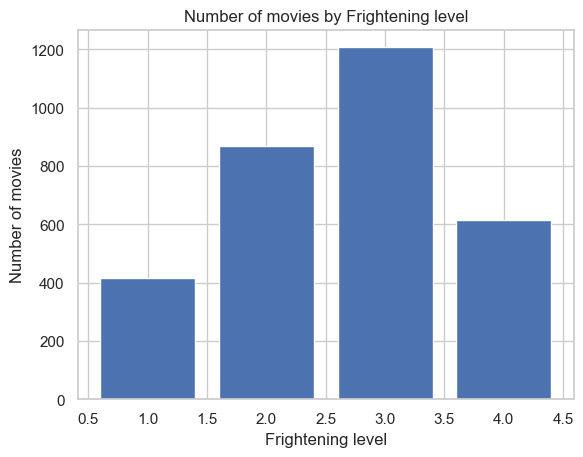

In [128]:
frightening_counts = df["Frightening"].value_counts()
plt.bar(frightening_counts.index, frightening_counts.values)
plt.title("Number of movies by Frightening level")
plt.xlabel("Frightening level")
plt.ylabel("Number of movies")
plt.show()

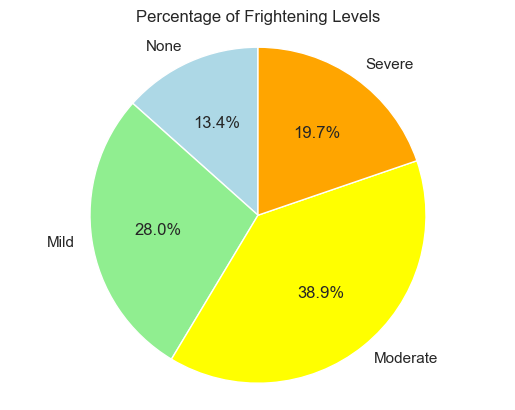

In [132]:
# Tính phần trăm các mức độ Frightening
none_percent = df[df["Frightening"] == 1].shape[0] / df.shape[0] * 100
mild_percent = df[df["Frightening"] == 2].shape[0] / df.shape[0] * 100
moderate_percent = df[df["Frightening"] == 3].shape[0] / df.shape[0] * 100
severe_percent = df[df["Frightening"] == 4].shape[0] / df.shape[0] * 100

# Vẽ biểu đồ tròn
labels = ["None", "Mild", "Moderate", "Severe"]
sizes = [none_percent, mild_percent, moderate_percent, severe_percent]
colors = ["lightblue", "lightgreen", "yellow", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage of Frightening Levels")
plt.show()

Dựa vào biểu đồ tròn, ta có thể rút ra các kết luận sau về cột Frightening:

* Số lượng phim có cảnh frightening vừa phải (mức độ Moderate) chiếm đa số với khoảng 39%.
* Số lượng phim không có cảnh frightening (mức độ None) chiếm thấp nhất với khoảng 13%.


Như vậy trên trang web IMDb chứa các phim đa số có cảnh frightening từ nhẹ, vừa đến nghiêm trọng.a